In [191]:
# imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pyLDAvis
import pyLDAvis.gensim
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
%matplotlib inline
import pickle
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.palettes import all_palettes
output_notebook()

#plt.style.use("dark_background")
sns.set_style('darkgrid')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=12)

Loading BokehJS ...

In [2]:
def load_model(path='LDA model/lda.model'):
    return LdaModel.load(path)

In [3]:
def load_dictionary(path='dataframes/dictionary.gensim'):
    return Dictionary.load(path)

In [4]:
def load_corpus(path='dataframes/corpus.pkl'):
    with open(path, 'rb') as file:
        corpus = pickle.load(file)
    return corpus

In [5]:
def export_dataframe(dataframe, path, file_format='csv'):
    if file_format == 'csv':
        dataframe.to_csv(path, index=False)
    elif file_format == 'pkl':
        dataframe.to_pickle(path, index=False)

In [6]:
def import_dataframe(path):
    df = pd.DataFrame()
    
    if path.endswith('.csv'):
        df = pd.read_csv(path)
    elif path.endswith('.pkl'):
        df = pd.read_pickle(path)
        
    return df

## Load dictionary and corpus

In [7]:
dictionary = load_dictionary('dataframes/dictionary.gensim')
corpus = load_corpus('dataframes/corpus.pkl')

print('Number of unique tokens: {}'.format(len(dictionary)))
print('Number of documents: {}'.format(len(corpus)))

Number of unique tokens: 7037
Number of documents: 3889


## Load optimal LDA model

In [8]:
lda_model = load_model('LDA model/lda.model')
num_topics = lda_model.num_topics
print('Number of topics: {}'.format(num_topics))

Number of topics: 29


## Visualization

In [11]:
lda_model.show_topics(num_topics=num_topics, formatted = False)

[(0,
  [('agreement', 0.16270201),
   ('contract', 0.06462111),
   ('clause', 0.030065829),
   ('obligation', 0.02096816),
   ('enter', 0.014415533),
   ('letter', 0.014161335),
   ('breach', 0.014091665),
   ('negotiation', 0.011969451),
   ('bind', 0.0093242),
   ('contractual', 0.009298084)]),
 (1,
  [('business', 0.1210069),
   ('lease', 0.080585435),
   ('licence', 0.04511677),
   ('rent', 0.03968413),
   ('premise', 0.031029163),
   ('management', 0.026126156),
   ('operate', 0.017151156),
   ('hotel', 0.01594759),
   ('commercial', 0.015725797),
   ('shop', 0.015290564)]),
 (2,
  [('contravention', 0.048323147),
   ('penalty', 0.034575652),
   ('offence', 0.028683212),
   ('charge', 0.026472805),
   ('criminal', 0.017292812),
   ('breach', 0.017008929),
   ('impose', 0.015792783),
   ('declaration', 0.013053386),
   ('public', 0.011036977),
   ('contravene', 0.009868253)]),
 (3,
  [('word', 0.02006259),
   ('determination', 0.016825002),
   ('subsection', 0.013929121),
   ('stat

### WordClouds of keywords for each topic

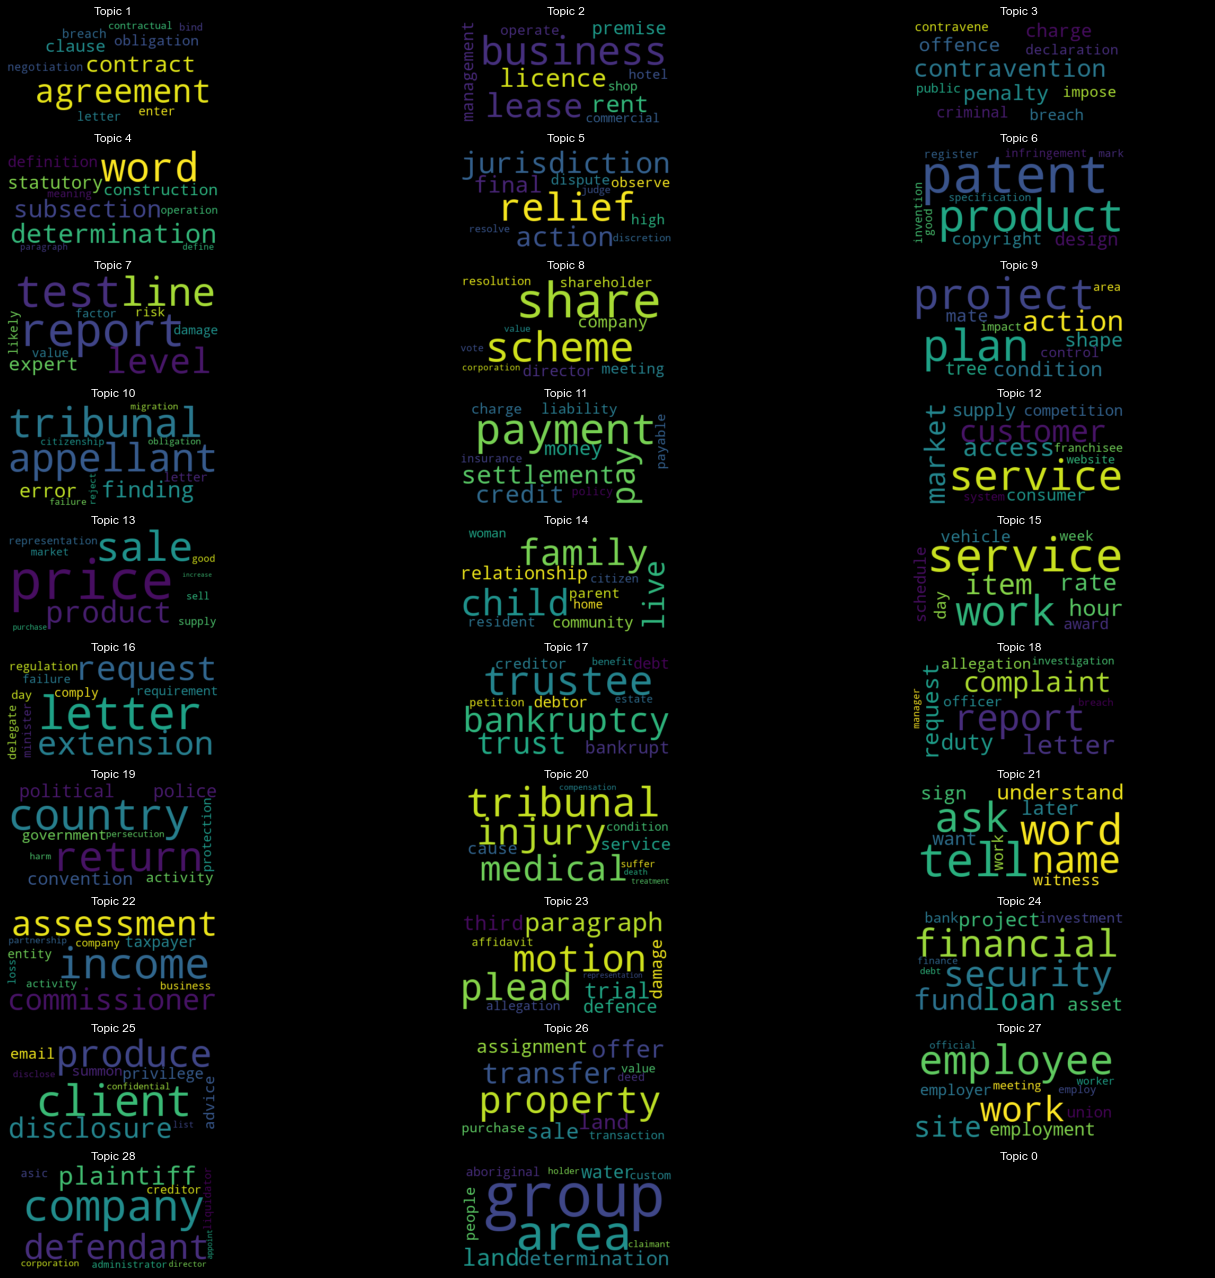

In [124]:
topics = lda_model.show_topics(num_topics=num_topics, formatted=False)

fig, axes = plt.subplots(10, 3, figsize=(23, 23), facecolor='black')

for i, ax in enumerate(axes.flatten()):
    ax.axis("off") 
    
    if i >= num_topics:
        break
    
    plt.gca().set_title("Topic {}".format(i), color = 'white')
    fig.add_subplot(ax)
    topic_keywords = dict(topics[i][1])

    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=topic_keywords)
    
    ax.imshow(wordcloud, interpolation='bilinear')

plt.show()

### Pie diagram of keywords distribution for each topic

C:\Users\Marko\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


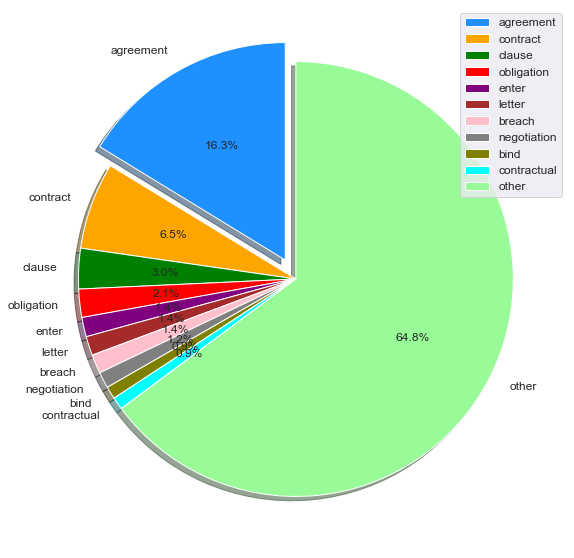

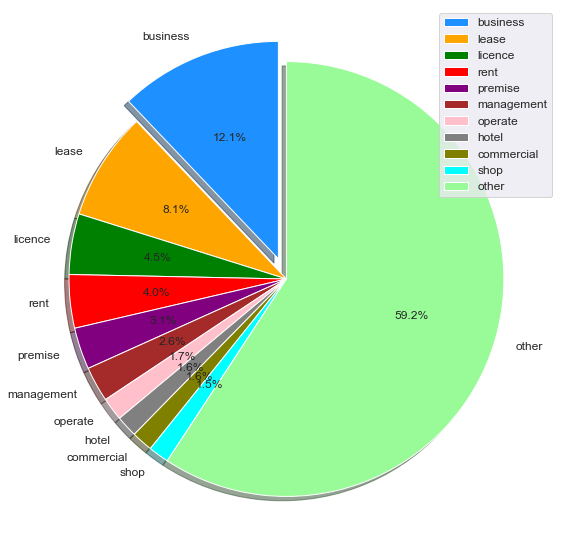

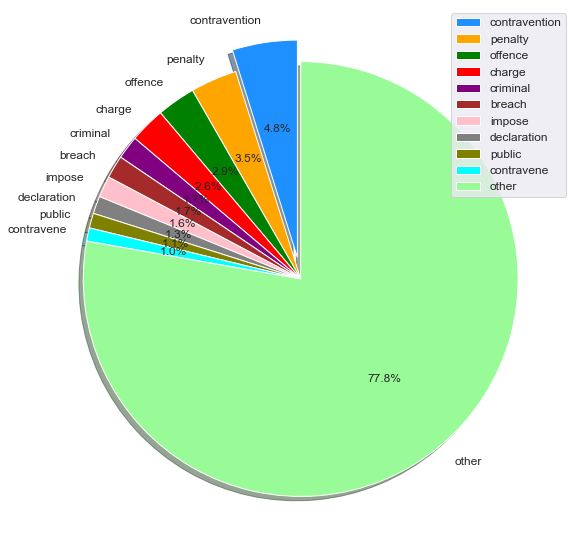

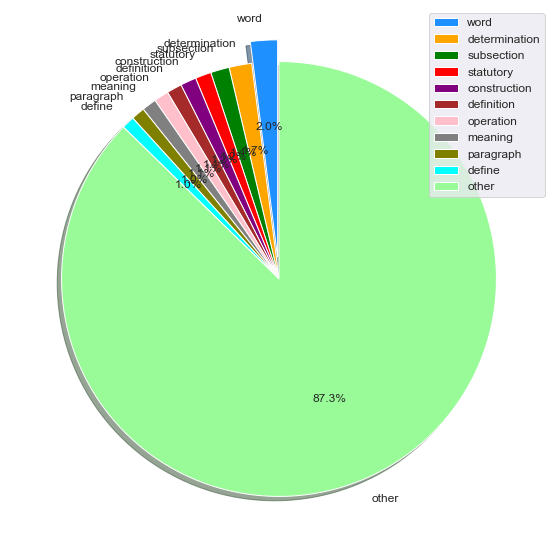

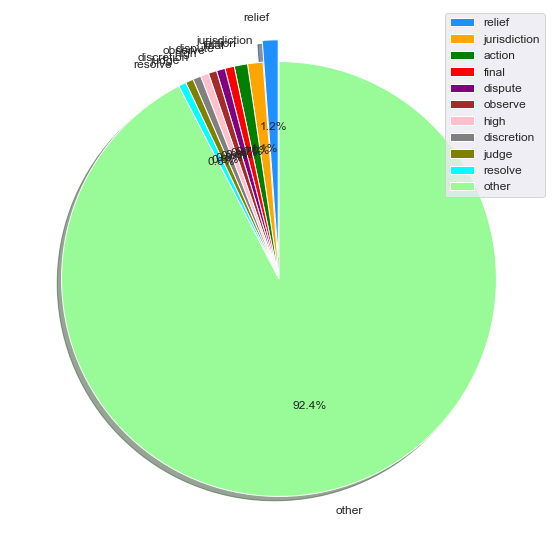

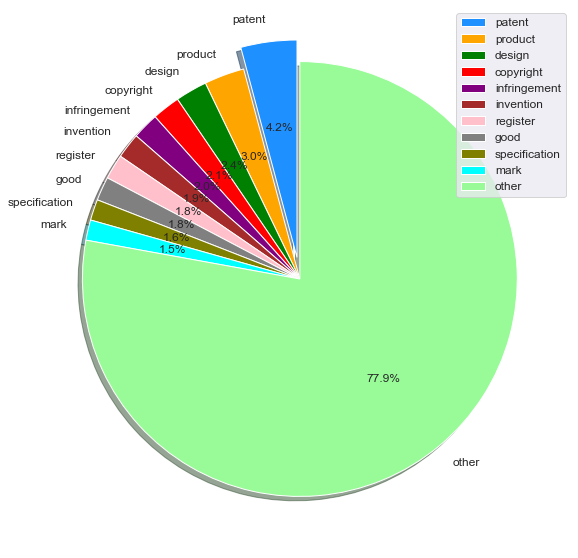

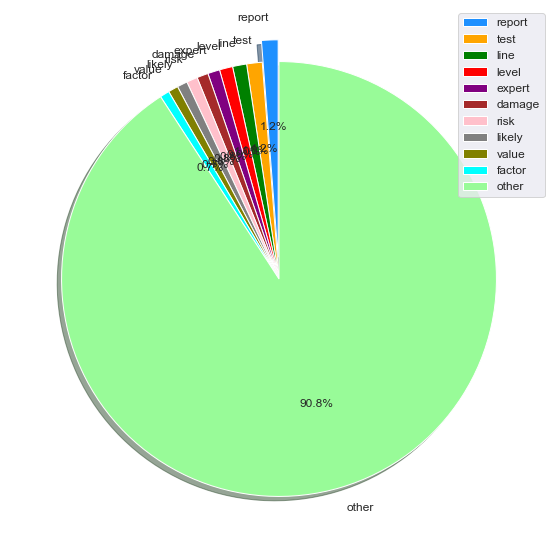

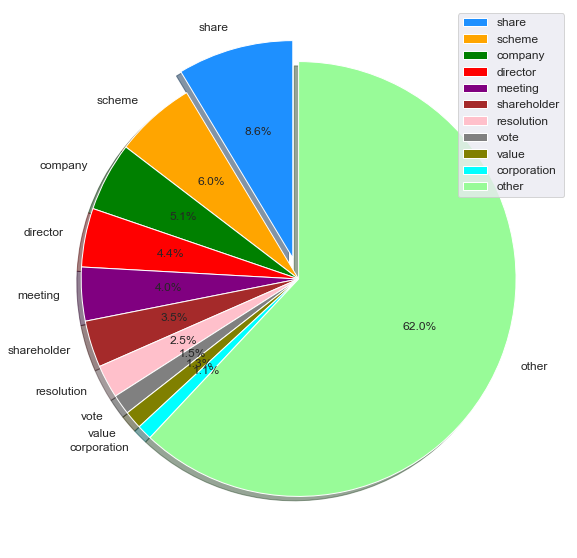

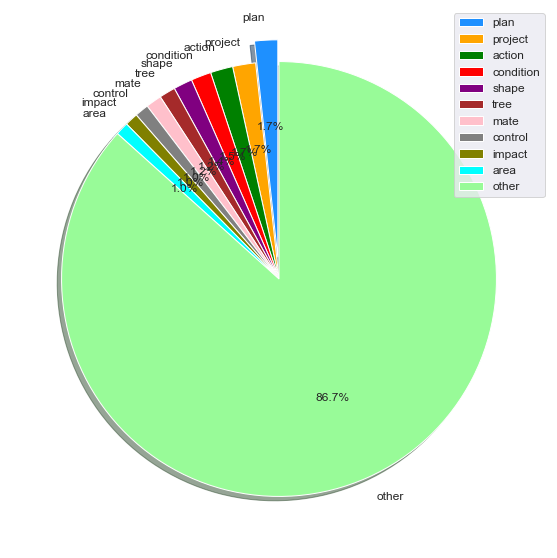

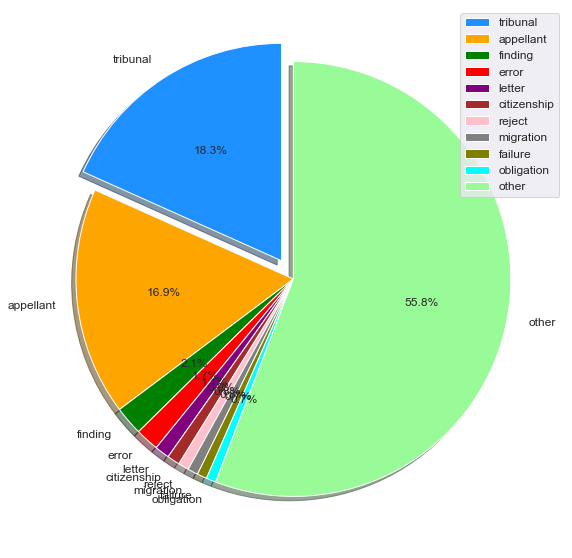

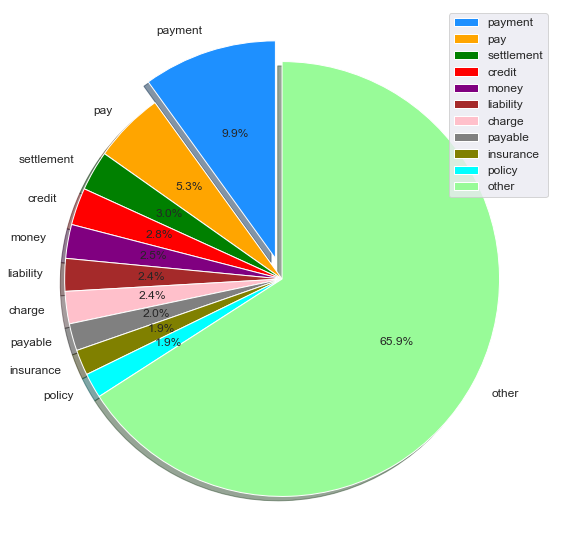

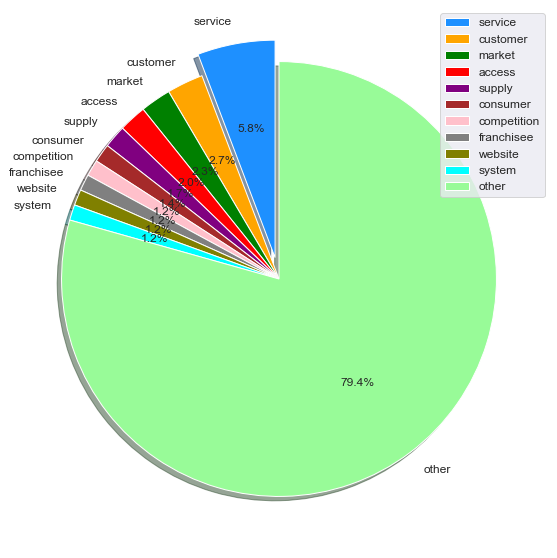

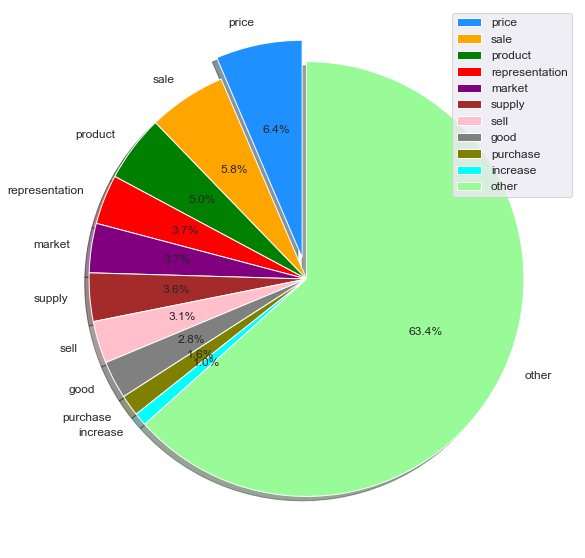

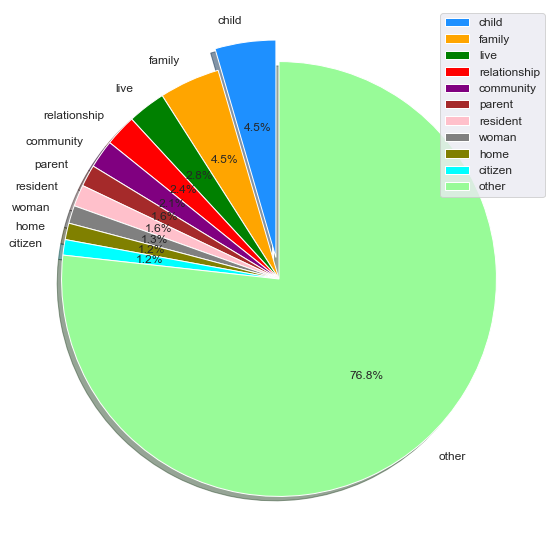

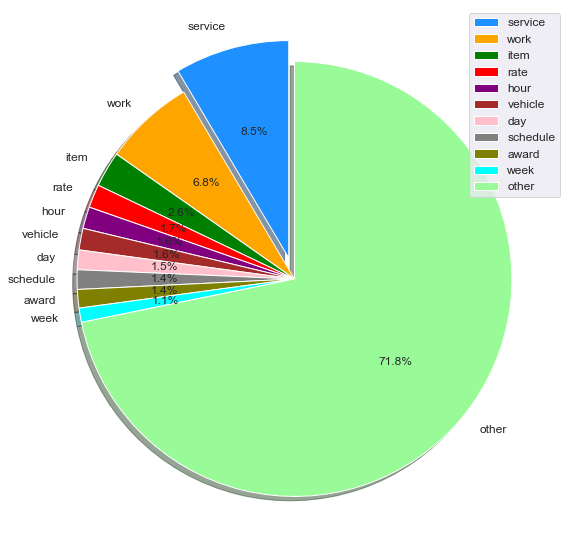

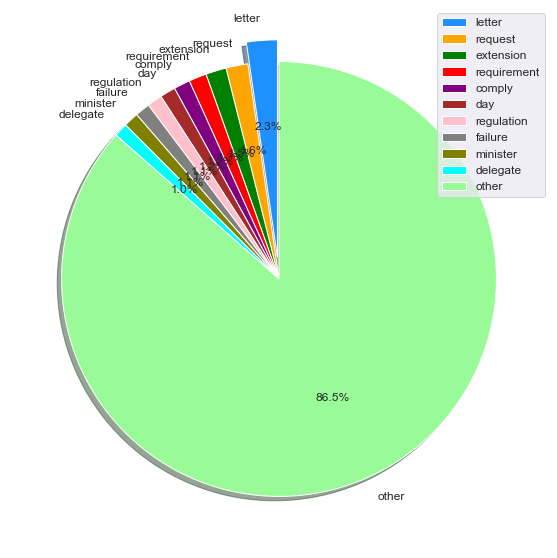

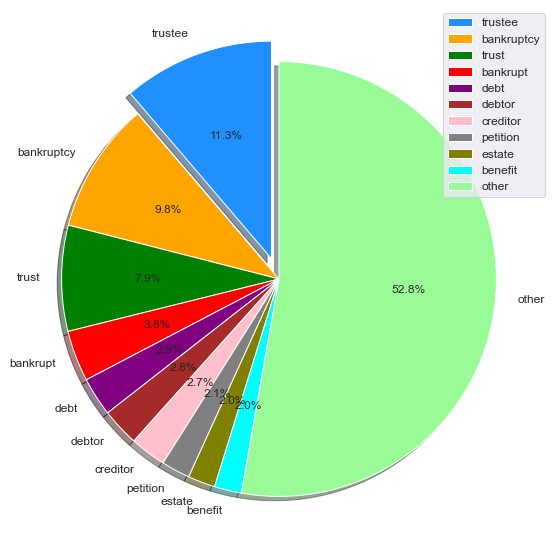

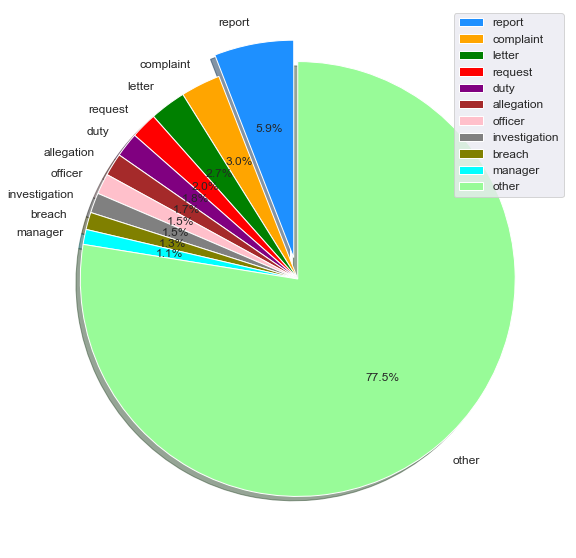

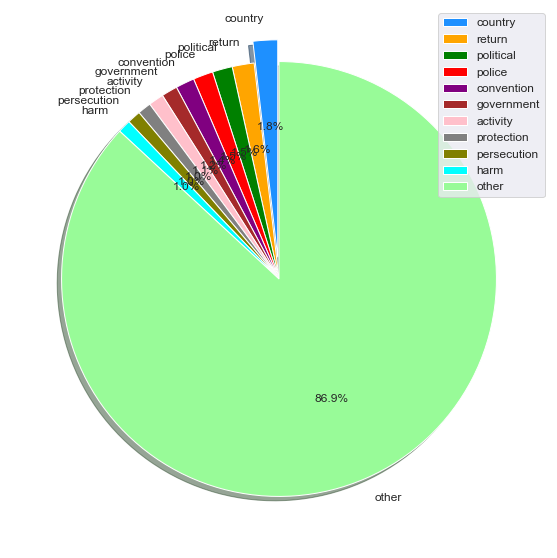

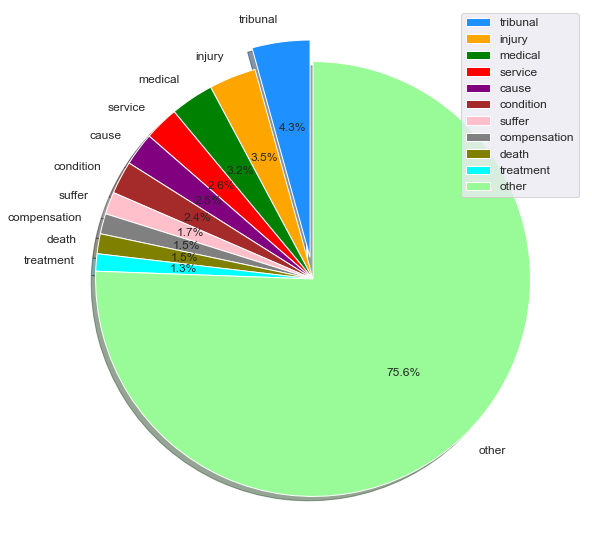

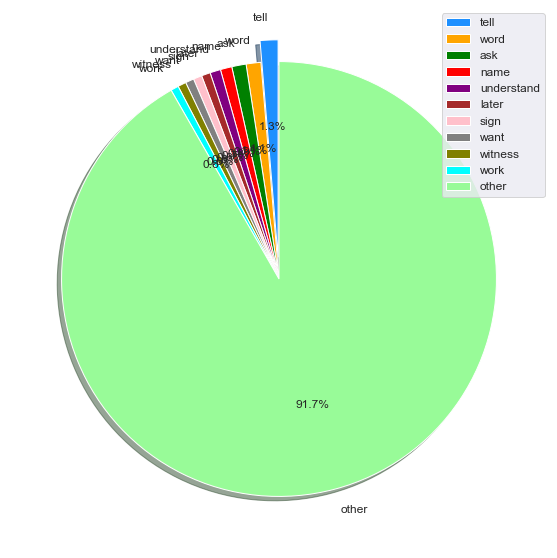

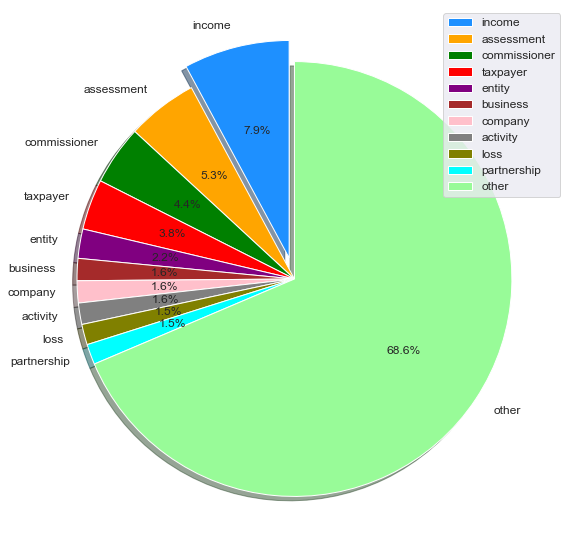

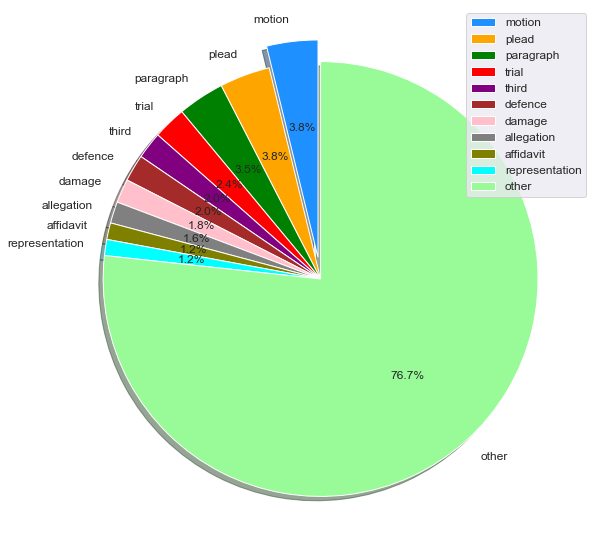

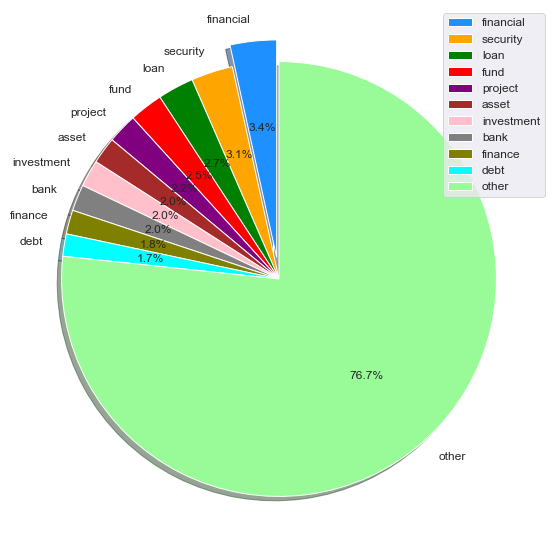

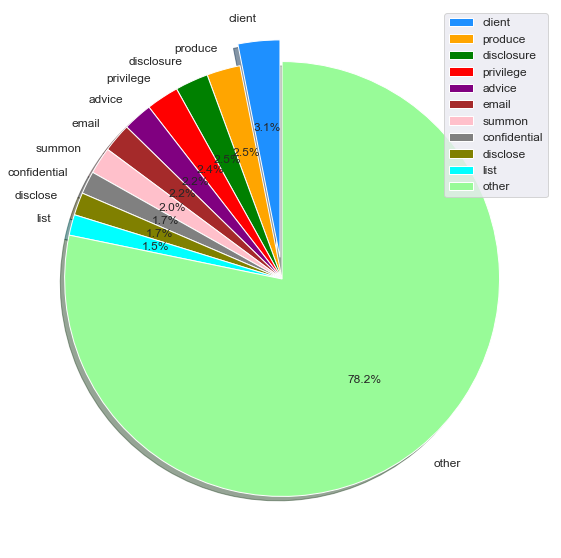

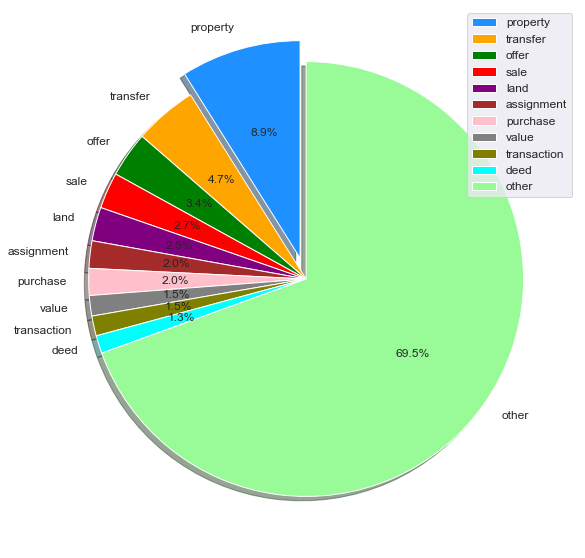

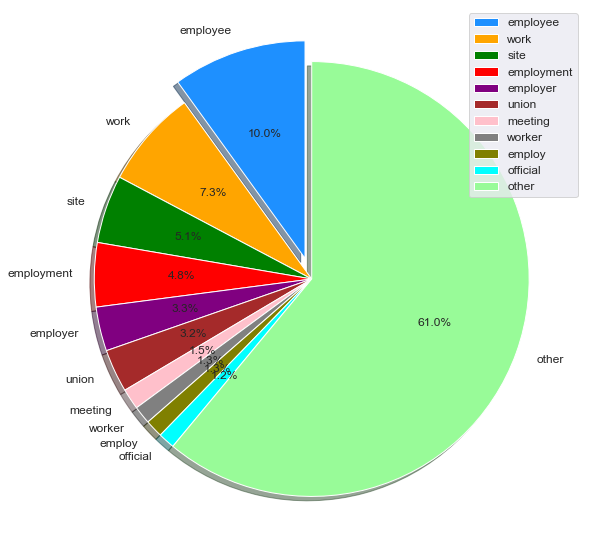

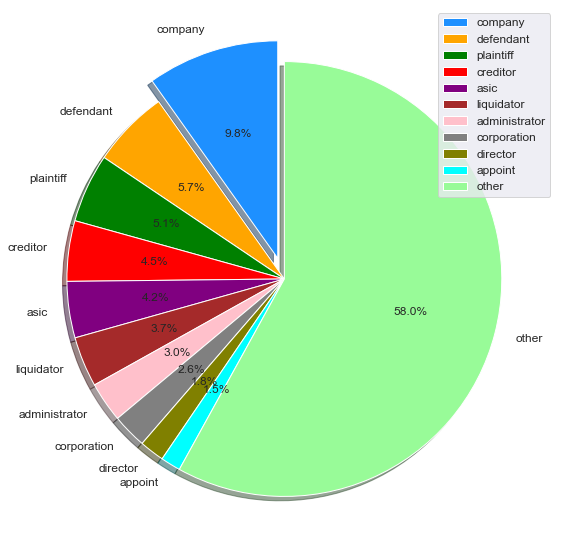

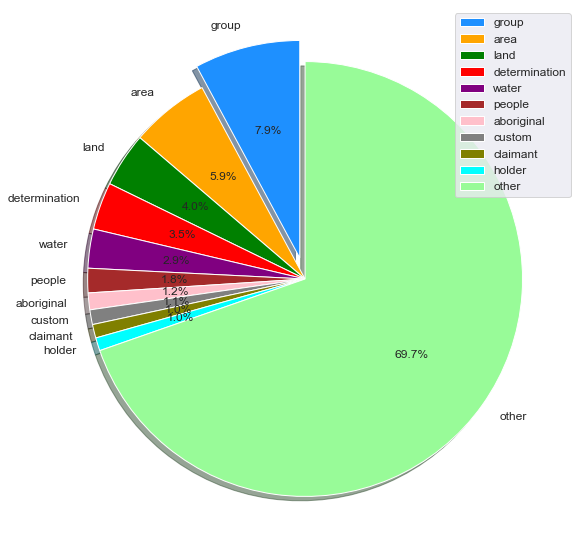

In [190]:
labels = []
sizes = []
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

colors = ['dodgerblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'palegreen']

for i, topic in enumerate(topics):
    for keyword in topic[1]:
        labels.append(keyword[0])
        sizes.append(keyword[1])

    labels.append('other')
    sizes.append(1.0 - sum(sizes))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
    plt.legend(labels, loc="best")
    
    labels = []
    sizes = []
    
# Click left of diagrams to expand window

### Plot number of documents in each topic

In [19]:
doc_topics_df = pd.read_csv('dataframes/topics_of_documents.csv')
doc_topics_df.head()

,dominant_topic,perc_contribution,topic_keywords,filename,text
0,4.0,0.3999,"relief, jurisdiction, action, final, dispute, ...",06_1.xml,background current application applicant holdi...
1,17.0,0.2325,"report, complaint, letter, request, duty, alle...",06_100.xml,application order review judicial_review conce...
2,24.0,0.3343,"client, produce, disclosure, privilege, advice...",06_1001.xml,notice motion file bring first second third ap...
3,0.0,0.1887,"agreement, contract, clause, obligation, enter...",06_1004.xml,introduction brand company know come marketing...
4,21.0,0.1860,"income, assessment, commissioner, taxpayer, en...",06_1005.xml,context present application appeal application...


Text(0, 0.5, 'Number of documents per topic')

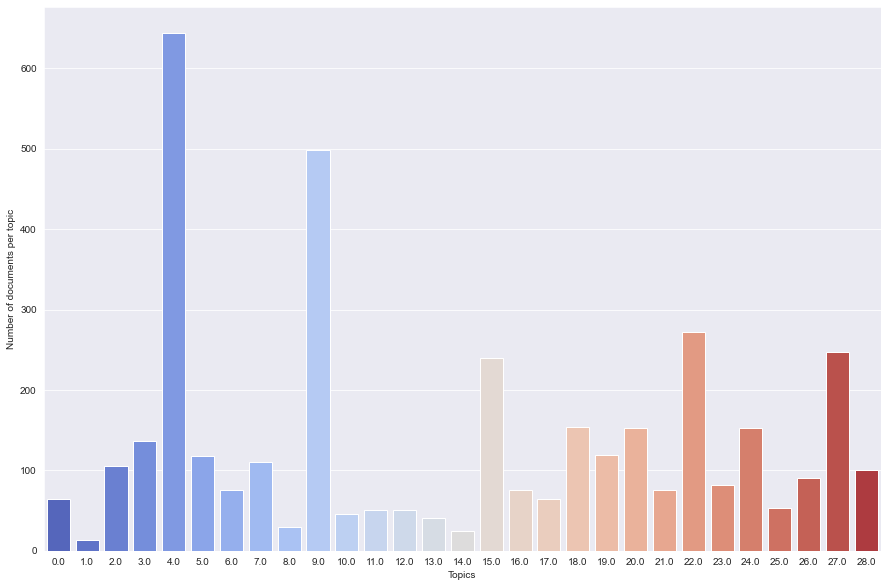

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(data=doc_topics_df, x='dominant_topic', palette='coolwarm')
plt.xlabel('Topics')
plt.ylabel('Number of documents per topic')

In [105]:
representative_docs_df = pd.read_csv('dataframes/representative_document_per_topic.csv')
representative_docs_df

,topic,perc_contribution,topic_keywords,filename,text
0,0.0,0.5201,"agreement, contract, clause, obligation, enter...",07_136.xml,second respondent apply court order stay proce...
1,1.0,0.3789,"business, lease, licence, rent, premise, manag...",09_682.xml,introduction complex situate open comprise num...
2,2.0,0.5477,"contravention, penalty, offence, charge, crimi...",06_1732.xml,make application court various remedy arise al...
3,3.0,0.5816,"word, determination, subsection, statutory, co...",07_1004.xml,division migration regulation regulation speci...
4,4.0,0.6566,"relief, jurisdiction, action, final, dispute, ...",08_47.xml,motion present court seek application leave ap...
5,5.0,0.5450,"patent, product, design, copyright, infringeme...",06_1267.xml,follow reason order make applicant appeal cour...
6,6.0,0.6227,"report, test, line, level, expert, damage, ris...",06_1141.xml,central issue proceeding concern determination...
7,7.0,0.7851,"share, scheme, company, director, meeting, sha...",07_1944.xml,second hear publish reason judgment order make...
8,8.0,0.5697,"plan, project, action, condition, shape, tree,...",08_903.xml,table content introduction application make ad...
9,9.0,0.7721,"tribunal, appellant, finding, error, letter, c...",09_89.xml,appeal order court dismiss appellant applicati...


### Plot contribution of dominant topics in the most representative documents

Text(0, 0.5, 'Contribution of dominant topic in the most representative documents')

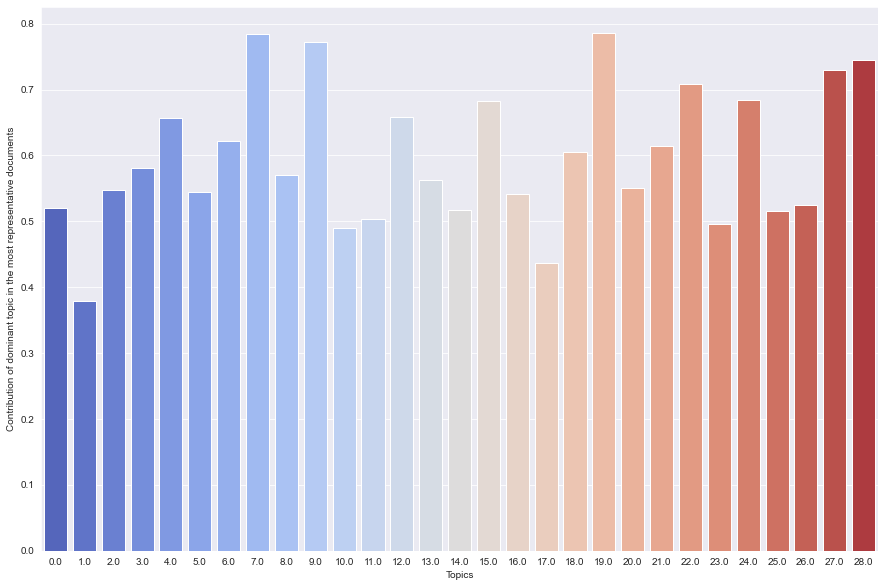

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x='topic', y='perc_contribution', data=representative_docs_df, palette='coolwarm')
plt.xlabel('Topics')
plt.ylabel('Contribution of dominant topic in the most representative documents')

### 2D visualization using PyLDAvis

In [114]:
def topics_visualization(lda_model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    return vis

In [117]:
vis = topics_visualization(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
20     0.144513 -0.004007       1        1  9.703007
4      0.151736  0.078010       2        1  8.636452
6      0.116163 -0.083222       3        1  5.589805
3      0.100659 -0.046293       4        1  5.532935
9      0.183049  0.140555       5        1  4.171340
15     0.086518  0.169429       6        1  4.088755
0     -0.046684  0.043574       7        1  4.038471
22     0.020000  0.108932       8        1  3.883000
23    -0.192135  0.013523       9        1  3.631796
8      0.090727 -0.130523      10        1  3.606449
18     0.183230  0.035229      11        1  3.485321
17     0.081328  0.130125      12        1  3.276350
12    -0.113227 -0.196092      13        1  3.209270
5      0.033731 -0.184839      14        1  3.166630
11     0.000394 -0.241217      15        1  2.807520
28     0.051418 -0.055110      16        1  2.675601
24     0.059213  0.053299      17        1  2.670006
2      0.047886 -0.001923      18        1  2.617698
27    -0.202001  0.139447      19        1  2.616624
26    -0.011329 -0.004206      20        1  2.511873
7     -0.177414  0.003594      21        1  2.490001
25    -0.174697  0.015831      22        1  2.394680
10    -0.199333  0.086081      23        1  2.267932
21    -0.105803 -0.052224      24        1  2.161676
19     0.141377  0.037183      25        1  2.030803
14    -0.043600 -0.132782      26        1  1.946387
13     0.107787 -0.022137      27        1  1.854652
1     -0.148770 -0.089969      28        1  1.709243
16    -0.184737  0.189734      29        1  1.225730, topic_info=     Category          Freq         Term         Total  loglift  logprob
2419  Default  38021.000000     tribunal  38021.000000  30.0000  30.0000
2167  Default  31597.000000    appellant  31597.000000  29.0000  29.0000
20    Default  30800.000000    agreement  30800.000000  28.0000  28.0000
112   Default  24138.000000      company  24138.000000  27.0000  27.0000
2150  Default  20259.000000         work  20259.000000  26.0000  26.0000
...       ...           ...          ...           ...      ...      ...
890   Topic29    297.224823  entitlement   3411.560547   1.9612  -5.2166
1761  Topic29    284.864868     official   2864.598145   2.0935  -5.2591
49    Topic29    310.860260        asset   5978.601074   1.4450  -5.1718
480   Topic29    292.612152          pay   9406.686523   0.9313  -5.2323
792   Topic29    291.557129       action  11175.816406   0.7554  -5.2359

[1933 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
2494     16  0.999875         aboriginal
5095     16  0.999625  aboriginal_people
787       8  0.992726            abridge
2513     17  0.909425           abrogate
2513     21  0.086612           abrogate
...     ...       ...                ...
2442     18  0.003732              young
2442     19  0.076877              young
2442     20  0.007464              young
2442     26  0.016420              young
2442     27  0.709803              young

[7952 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 5, 7, 4, 10, 16, 1, 23, 24, 9, 19, 18, 13, 6, 12, 29, 25, 3, 28, 27, 8, 26, 11, 22, 20, 15, 14, 2, 17])